In [1]:
#import Libraries
import numpy as np
import pandas as pd
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
reviews=pd.read_csv("C:\\Users\\prasa\\Downloads\\Reviews.csv")
reviews

,Title,Ratings,Reviews
0,MS Office not installed,1.0 out of 5 stars,MS Office trial version was installed in lapto...
1,Perfect for basic tasking.,5.0 out of 5 stars,The laptop looks better in person than the ima...
2,Great working and student laptop. Not for phot...,4.0 out of 5 stars,After one month of use I'm pretty impressed wi...
3,Feel cheated,1.0 out of 5 stars,MS office is trial version. No where it mentio...
4,excellent,5.0 out of 5 stars,awesome & budget friendly laptop so fast with...
5,"Please don't buy this product waste, I have wa...",1.0 out of 5 stars,Waste product I have 40days beforeIt is hanged...
6,Best laptop,5.0 out of 5 stars,I have used so many models but this one is per...
7,VEry poor one. Hit with white gray screen glitch,1.0 out of 5 stars,"After 2 months of usage, screen show white-gra..."
8,The Product is Good,4.0 out of 5 stars,The Laptop is good. But the product page is ne...
9,Lenovo ideapad slim 3,5.0 out of 5 stars,Nice look and weight is very light speed is ve...


## Text Processing

In [4]:
reviews=[Reviews.strip() for Reviews in reviews.Reviews] # remove both the leading and the trailing characters
reviews=[Reviews for Reviews in reviews if Reviews] # removes empty strings, because they are considered in Python as False
reviews

['MS Office trial version was installed in laptop though i bought the license of MS Office which was mentioned on the product description',
 "The laptop looks better in person than the images on Amazon, although it comes with a plastic body but will give you a metal look. It is slim and over all look is superb. It just takes 5 seconds to switch on thanks to the SSD. Web cam is decent enough for video calls it just does its job I won't say its great but again you are not going to use it for your instagram pictures. Talking about the speakers its not that great you will have to use headphones for media purpose. Touchpad is smooth but it feels a little flimsy to me but it does it's job perfectly.In short if you are looking for budget laptop for basic tasks such as browsing office work or entertainment you can go for it. I got it for 27K by exchanging my old HP laptop so for me it was a great deal.",
 "After one month of use I'm pretty impressed with all the features this laptop offers. Th

In [5]:
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text

"MS Office trial version was installed in laptop though i bought the license of MS Office which was mentioned on the product description The laptop looks better in person than the images on Amazon, although it comes with a plastic body but will give you a metal look. It is slim and over all look is superb. It just takes 5 seconds to switch on thanks to the SSD. Web cam is decent enough for video calls it just does its job I won't say its great but again you are not going to use it for your instagram pictures. Talking about the speakers its not that great you will have to use headphones for media purpose. Touchpad is smooth but it feels a little flimsy to me but it does it's job perfectly.In short if you are looking for budget laptop for basic tasks such as browsing office work or entertainment you can go for it. I got it for 27K by exchanging my old HP laptop so for me it was a great deal. After one month of use I'm pretty impressed with all the features this laptop offers. The only co

In [6]:
#Punctuation
no_punc_text = reviews_text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'MS Office trial version was installed in laptop though i bought the license of MS Office which was mentioned on the product description The laptop looks better in person than the images on Amazon although it comes with a plastic body but will give you a metal look It is slim and over all look is superb It just takes 5 seconds to switch on thanks to the SSD Web cam is decent enough for video calls it just does its job I wont say its great but again you are not going to use it for your instagram pictures Talking about the speakers its not that great you will have to use headphones for media purpose Touchpad is smooth but it feels a little flimsy to me but it does its job perfectlyIn short if you are looking for budget laptop for basic tasks such as browsing office work or entertainment you can go for it I got it for 27K by exchanging my old HP laptop so for me it was a great deal After one month of use Im pretty impressed with all the features this laptop offers The only con I can think

In [12]:
#Tokenization
from nltk.tokenize import word_tokenize
review_tokens = word_tokenize(no_punc_text)
print(review_tokens)

['MS', 'Office', 'trial', 'version', 'was', 'installed', 'in', 'laptop', 'though', 'i', 'bought', 'the', 'license', 'of', 'MS', 'Office', 'which', 'was', 'mentioned', 'on', 'the', 'product', 'description', 'The', 'laptop', 'looks', 'better', 'in', 'person', 'than', 'the', 'images', 'on', 'Amazon', 'although', 'it', 'comes', 'with', 'a', 'plastic', 'body', 'but', 'will', 'give', 'you', 'a', 'metal', 'look', 'It', 'is', 'slim', 'and', 'over', 'all', 'look', 'is', 'superb', 'It', 'just', 'takes', '5', 'seconds', 'to', 'switch', 'on', 'thanks', 'to', 'the', 'SSD', 'Web', 'cam', 'is', 'decent', 'enough', 'for', 'video', 'calls', 'it', 'just', 'does', 'its', 'job', 'I', 'wont', 'say', 'its', 'great', 'but', 'again', 'you', 'are', 'not', 'going', 'to', 'use', 'it', 'for', 'your', 'instagram', 'pictures', 'Talking', 'about', 'the', 'speakers', 'its', 'not', 'that', 'great', 'you', 'will', 'have', 'to', 'use', 'headphones', 'for', 'media', 'purpose', 'Touchpad', 'is', 'smooth', 'but', 'it', 'fe

In [13]:
len(review_tokens)

431

In [15]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in review_tokens if not word in my_stop_words]
print(no_stop_tokens)

['MS', 'Office', 'trial', 'version', 'installed', 'laptop', 'though', 'bought', 'license', 'MS', 'Office', 'mentioned', 'product', 'description', 'The', 'laptop', 'looks', 'better', 'person', 'images', 'Amazon', 'although', 'comes', 'plastic', 'body', 'give', 'metal', 'look', 'It', 'slim', 'look', 'superb', 'It', 'takes', '5', 'seconds', 'switch', 'thanks', 'SSD', 'Web', 'cam', 'decent', 'enough', 'video', 'calls', 'job', 'I', 'wont', 'say', 'great', 'going', 'use', 'instagram', 'pictures', 'Talking', 'speakers', 'great', 'use', 'headphones', 'media', 'purpose', 'Touchpad', 'smooth', 'feels', 'little', 'flimsy', 'job', 'perfectlyIn', 'short', 'looking', 'budget', 'laptop', 'basic', 'tasks', 'browsing', 'office', 'work', 'entertainment', 'go', 'I', 'got', '27K', 'exchanging', 'old', 'HP', 'laptop', 'great', 'deal', 'After', 'one', 'month', 'use', 'Im', 'pretty', 'impressed', 'features', 'laptop', 'offers', 'The', 'con', 'I', 'think', 'poor', 'SRGB', 'rating', 'causes', 'colors', 'screen

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words)

['ms', 'office', 'trial', 'version', 'installed', 'laptop', 'though', 'bought', 'license', 'ms', 'office', 'mentioned', 'product', 'description', 'the', 'laptop', 'looks', 'better', 'person', 'images', 'amazon', 'although', 'comes', 'plastic', 'body', 'give', 'metal', 'look', 'it', 'slim', 'look', 'superb', 'it', 'takes', '5', 'seconds', 'switch', 'thanks', 'ssd', 'web', 'cam', 'decent', 'enough', 'video', 'calls', 'job', 'i', 'wont', 'say', 'great', 'going', 'use', 'instagram', 'pictures', 'talking', 'speakers', 'great', 'use', 'headphones', 'media', 'purpose', 'touchpad', 'smooth', 'feels', 'little', 'flimsy', 'job', 'perfectlyin', 'short', 'looking', 'budget', 'laptop', 'basic', 'tasks', 'browsing', 'office', 'work', 'entertainment', 'go', 'i', 'got', '27k', 'exchanging', 'old', 'hp', 'laptop', 'great', 'deal', 'after', 'one', 'month', 'use', 'im', 'pretty', 'impressed', 'features', 'laptop', 'offers', 'the', 'con', 'i', 'think', 'poor', 'srgb', 'rating', 'causes', 'colors', 'screen

In [17]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['ms', 'offic', 'trial', 'version', 'instal', 'laptop', 'though', 'bought', 'licens', 'ms', 'offic', 'mention', 'product', 'descript', 'the', 'laptop', 'look', 'better', 'person', 'imag', 'amazon', 'although', 'come', 'plastic', 'bodi', 'give', 'metal', 'look', 'it', 'slim', 'look', 'superb', 'it', 'take', '5', 'second', 'switch', 'thank', 'ssd', 'web', 'cam', 'decent', 'enough', 'video', 'call', 'job', 'i', 'wont', 'say', 'great', 'go', 'use', 'instagram', 'pictur', 'talk', 'speaker', 'great', 'use', 'headphon', 'media', 'purpos', 'touchpad', 'smooth', 'feel', 'littl', 'flimsi', 'job', 'perfectlyin', 'short', 'look', 'budget', 'laptop', 'basic', 'task', 'brows', 'offic', 'work', 'entertain', 'go', 'i', 'got', '27k', 'exchang', 'old', 'hp', 'laptop', 'great', 'deal', 'after', 'one', 'month', 'use', 'im', 'pretti', 'impress', 'featur', 'laptop', 'offer', 'the', 'con', 'i', 'think', 'poor', 'srgb', 'rate', 'caus', 'color', 'screen', 'seem', 'less', 'satur', 'matter', 'adjust', 'set', 'th

In [18]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [19]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc)

MS Office trial version installed laptop though bought license MS Office mentioned product description The laptop looks better person images Amazon although comes plastic body give metal look It slim look superb It takes 5 seconds switch thanks SSD Web cam decent enough video calls job I wont say great going use instagram pictures Talking speakers great use headphones media purpose Touchpad smooth feels little flimsy job perfectlyIn short looking budget laptop basic tasks browsing office work entertainment go I got 27K exchanging old HP laptop great deal After one month use Im pretty impressed features laptop offers The con I think poor SRGB rating causes colors screen seem less saturated matter adjust settings The colors also seem washed distorted viewed angle At price range given intended intensive photo editing gaming purpose big issue working Also month use boot speed also slowing It used start within seconds initially takes minutes two Also battery life lasts around 34 hours like 

In [20]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['MS', 'Office', 'trial', 'version', 'instal', 'laptop', 'though', 'buy', 'license', 'MS', 'Office', 'mention', 'product', 'description', 'the', 'laptop', 'look', 'well', 'person', 'image', 'Amazon', 'although', 'come', 'plastic', 'body', 'give', 'metal', 'look', '-PRON-', 'slim', 'look', 'superb', '-PRON-', 'take', '5', 'second', 'switch', 'thank', 'SSD', 'web', 'cam', 'decent', 'enough', 'video', 'call', 'job', '-PRON-', 'will', 'not', 'say', 'great', 'go', 'use', 'instagram', 'picture', 'talk', 'speaker', 'great', 'use', 'headphone', 'media', 'purpose', 'Touchpad', 'smooth', 'feel', 'little', 'flimsy', 'job', 'perfectlyIn', 'short', 'look', 'budget', 'laptop', 'basic', 'task', 'browse', 'office', 'work', 'entertainment', 'go', '-PRON-', 'get', '27', 'k', 'exchange', 'old', 'HP', 'laptop', 'great', 'deal', 'after', 'one', 'month', 'use', '-PRON-', 'be', 'pretty', 'impressed', 'feature', 'laptop', 'offer', 'the', 'con', '-PRON-', 'think', 'poor', 'SRGB', 'rating', 'cause', 'color', 's

In [21]:
final_reviews=' '.join(lemmas)
final_reviews

'MS Office trial version instal laptop though buy license MS Office mention product description the laptop look well person image Amazon although come plastic body give metal look -PRON- slim look superb -PRON- take 5 second switch thank SSD web cam decent enough video call job -PRON- will not say great go use instagram picture talk speaker great use headphone media purpose Touchpad smooth feel little flimsy job perfectlyIn short look budget laptop basic task browse office work entertainment go -PRON- get 27 k exchange old HP laptop great deal after one month use -PRON- be pretty impressed feature laptop offer the con -PRON- think poor SRGB rating cause color screen seem less saturate matter adjust setting the color also seem wash distorted viewed angle at price range give intend intensive photo editing gaming purpose big issue work also month use boot speed also slow -PRON- use start within second initially take minute two also battery life last around 34 hour like promise everything 

## Feature Extraction

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [23]:
print(vectorizer.vocabulary_)

{'ms': 98, 'office': 105, 'trial': 153, 'version': 157, 'instal': 74, 'laptop': 80, 'though': 151, 'buy': 29, 'license': 83, 'mention': 92, 'product': 119, 'description': 40, 'the': 149, 'look': 88, 'well': 164, 'person': 111, 'image': 68, 'amazon': 10, 'although': 9, 'come': 34, 'plastic': 114, 'body': 23, 'give': 59, 'metal': 93, 'pron': 121, 'slim': 135, 'superb': 143, 'take': 145, 'second': 130, 'switch': 144, 'thank': 148, 'ssd': 141, 'web': 162, 'cam': 31, 'decent': 39, 'enough': 47, 'video': 158, 'call': 30, 'job': 78, 'will': 166, 'not': 103, 'say': 128, 'great': 62, 'go': 60, 'use': 156, 'instagram': 73, 'picture': 113, 'talk': 146, 'speaker': 138, 'headphone': 65, 'media': 91, 'purpose': 123, 'touchpad': 152, 'smooth': 137, 'feel': 53, 'little': 87, 'flimsy': 55, 'perfectlyin': 110, 'short': 133, 'budget': 27, 'basic': 16, 'task': 147, 'browse': 26, 'work': 169, 'entertainment': 48, 'get': 58, '27': 1, 'exchange': 50, 'old': 106, 'hp': 67, 'deal': 38, 'after': 7, 'one': 107, 

In [24]:
print(vectorizer.get_feature_names())
print(X.toarray())

['11', '27', '2hours', '2nd', '34', '40days', 'adjust', 'after', 'also', 'although', 'amazon', 'angle', 'around', 'as', 'at', 'awesome', 'basic', 'battery', 'be', 'beforeit', 'big', 'blue', 'board', 'body', 'boot', 'bottom', 'browse', 'budget', 'but', 'buy', 'call', 'cam', 'cause', 'color', 'come', 'con', 'connection', 'correct', 'deal', 'decent', 'description', 'detail', 'direct', 'distorted', 'do', 'editing', 'else', 'enough', 'entertainment', 'everything', 'exchange', 'fast', 'feature', 'feel', 'fine', 'flimsy', 'friendly', 'gaming', 'get', 'give', 'go', 'good', 'great', 'grey', 'hang', 'headphone', 'hour', 'hp', 'image', 'immediately', 'impressed', 'include', 'initially', 'instagram', 'instal', 'intend', 'intensive', 'issue', 'job', 'key', 'laptop', 'last', 'less', 'license', 'life', 'light', 'like', 'little', 'look', 'many', 'matter', 'media', 'mention', 'metal', 'minute', 'mislead', 'model', 'month', 'ms', 'need', 'network', 'nice', 'no', 'not', 'offer', 'office', 'old', 'one', '

C:\Users\prasa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
print(X.toarray().shape)

(245, 170)


## CountVectorizer( Bigrams & Trigrams)

In [26]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas)

In [27]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['11', 'after', 'also', 'body', 'boot', 'bottom', 'browse', 'budget', 'but', 'buy', 'call', 'cam', 'color', 'do', 'fast', 'give', 'go', 'great', 'job', 'laptop', 'look', 'many', 'media', 'mention', 'metal', 'minute', 'mislead', 'model', 'month', 'ms', 'need', 'network', 'nice', 'no', 'not', 'offer', 'office', 'old', 'one', 'page', 'perfect', 'perfectlyin', 'person', 'photo', 'picture', 'plastic', 'poor', 'port', 'pretty', 'price', 'product', 'promise', 'pron', 'purchase', 'purpose', 'range', 'rating', 'reference', 'saturate', 'say', 'screen', 'second', 'seem', 'setting', 'short', 'show', 'slim', 'slow', 'smooth', 'speaker', 'speed', 'srgb', 'ssd', 'start', 'superb', 'switch', 'take', 'talk', 'task', 'thank', 'the', 'think', 'though', 'touchpad', 'trial', 'two', 'usage', 'use', 'version', 'video', 'viewed', 'wash', 'waste', 'web', 'weight', 'well', 'whitegray', 'will', 'window', 'work']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 

## TFidf vectorizer

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['11', '27', '2hours', '2nd', '34', '40days', 'adjust', 'after', 'also', 'although', 'amazon', 'angle', 'around', 'as', 'at', 'awesome', 'basic', 'battery', 'be', 'beforeit', 'big', 'blue', 'board', 'body', 'boot', 'bottom', 'browse', 'budget', 'but', 'buy', 'call', 'cam', 'cause', 'color', 'come', 'con', 'connection', 'correct', 'deal', 'decent', 'description', 'detail', 'direct', 'distorted', 'do', 'editing', 'else', 'enough', 'entertainment', 'everything', 'exchange', 'fast', 'feature', 'feel', 'fine', 'flimsy', 'friendly', 'gaming', 'get', 'give', 'go', 'good', 'great', 'grey', 'hang', 'headphone', 'hour', 'hp', 'image', 'immediately', 'impressed', 'include', 'initially', 'instagram', 'instal', 'intend', 'intensive', 'issue', 'job', 'key', 'laptop', 'last', 'less', 'license', 'life', 'light', 'like', 'little', 'look', 'many', 'matter', 'media', 'mention', 'metal', 'minute', 'mislead', 'model', 'month', 'ms', 'need', 'network', 'nice', 'no', 'not', 'offer', 'office', 'old', 'one', '

## Generate wordcloud

In [29]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

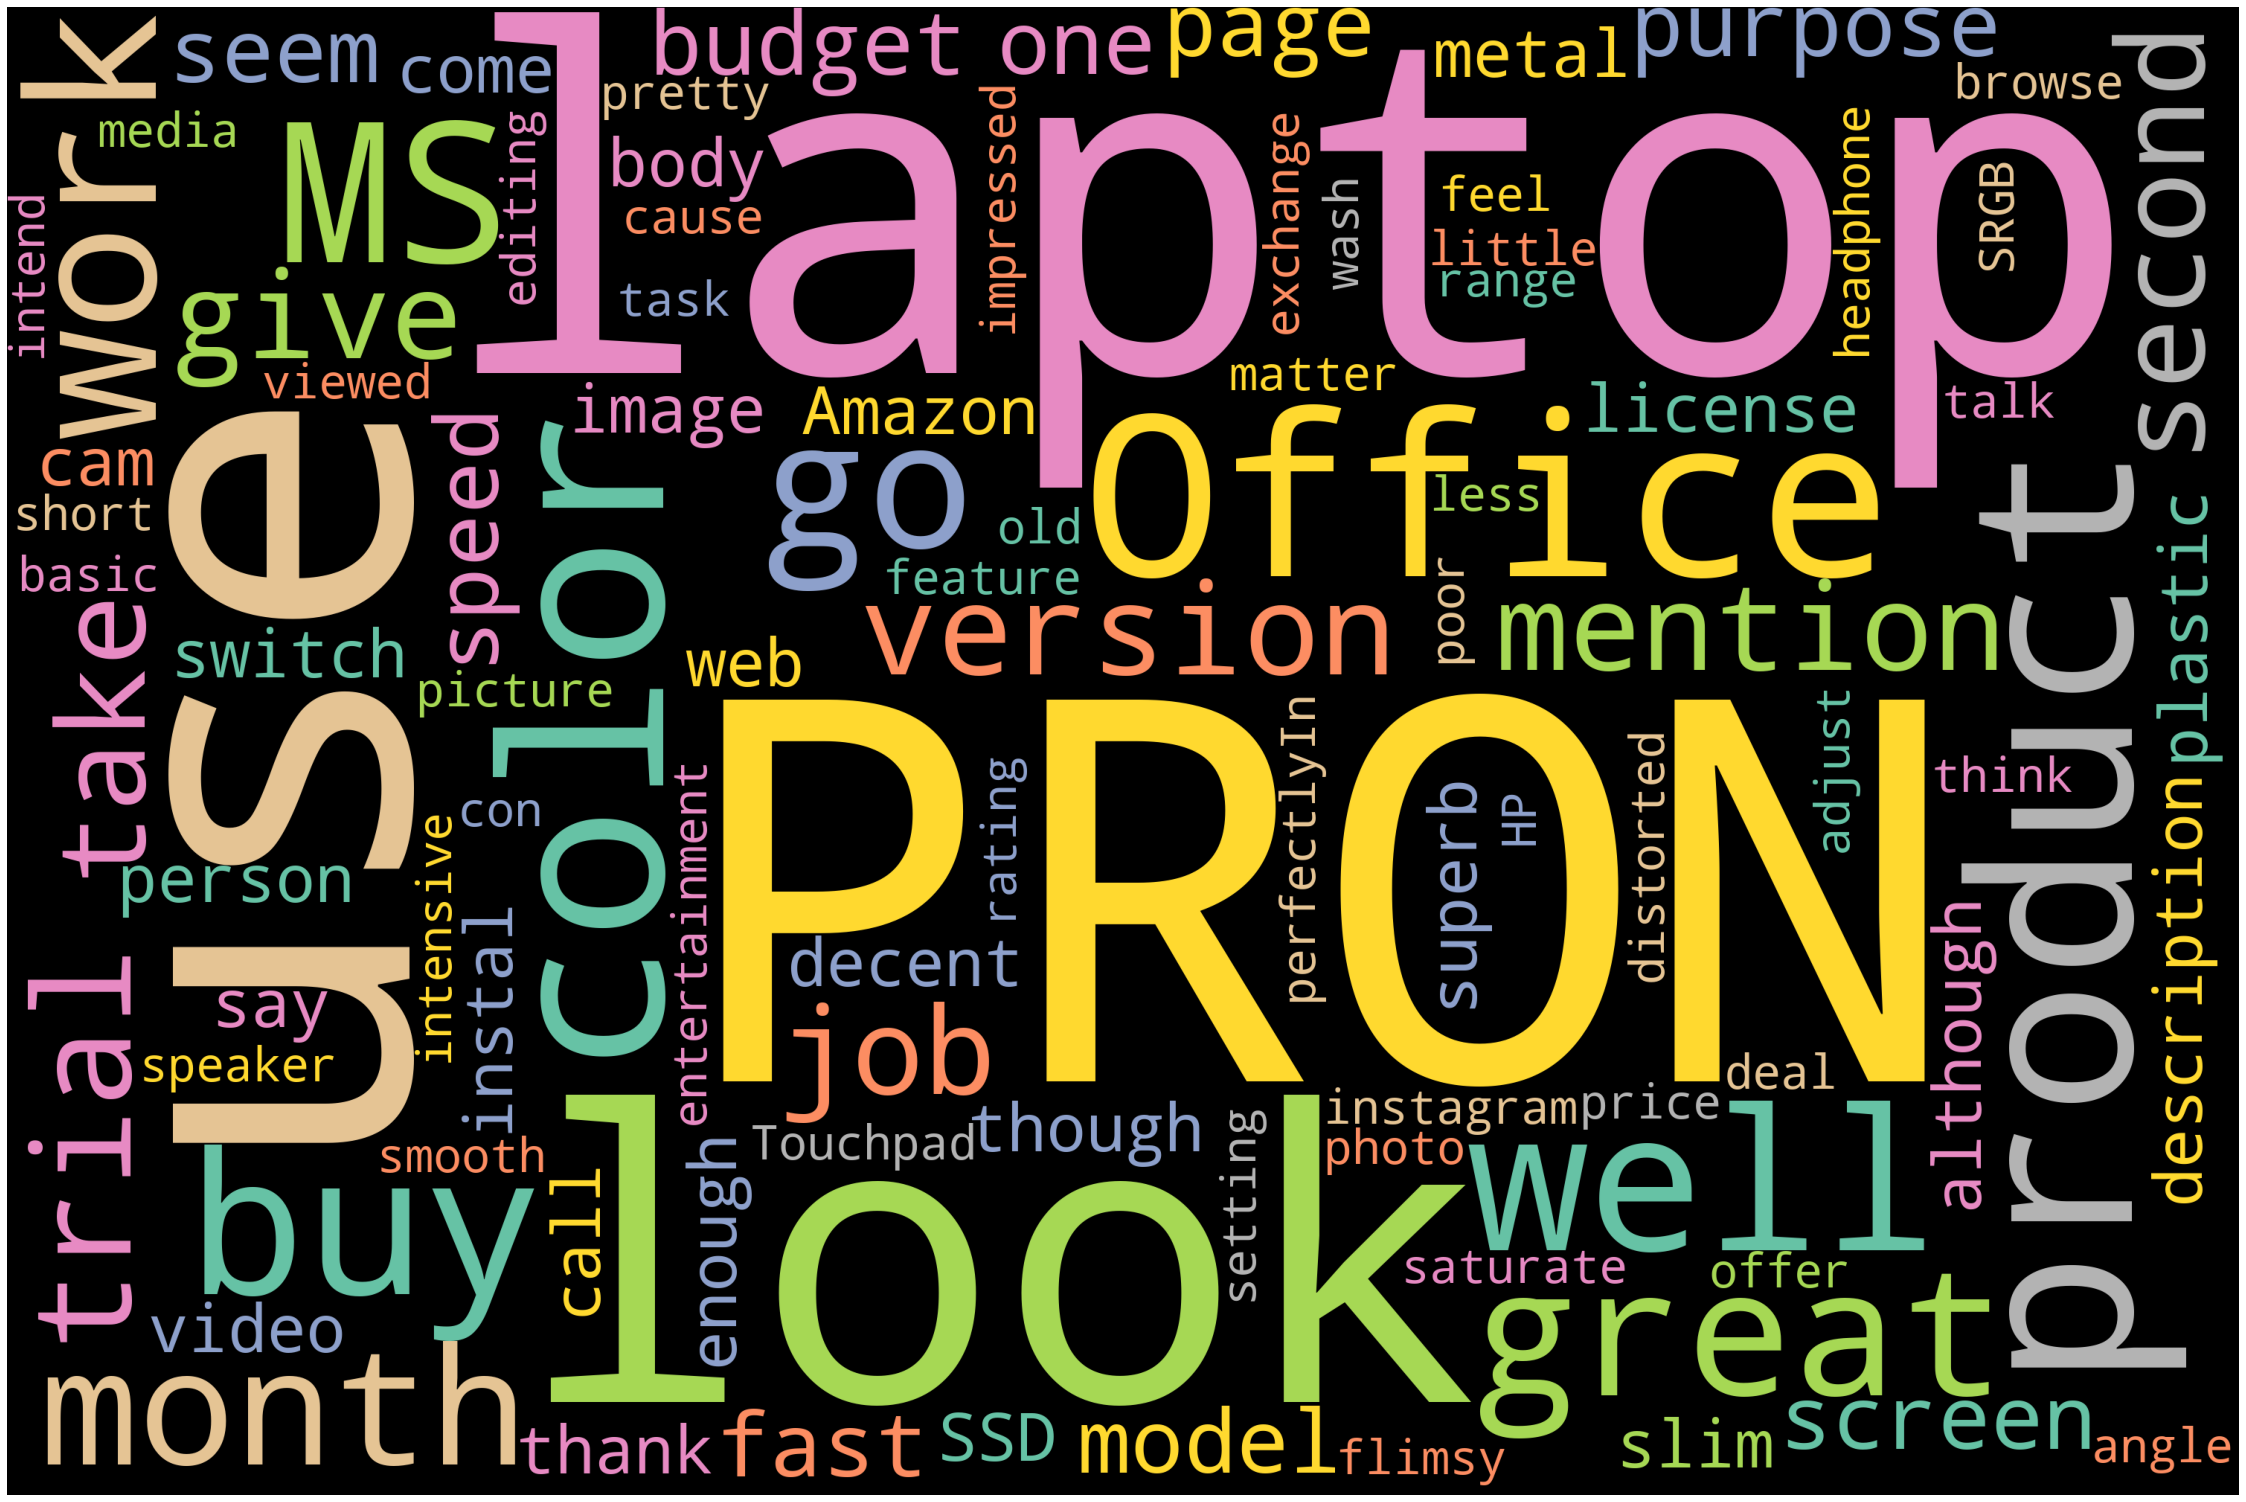

In [31]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(final_reviews)
# Plot
plot_cloud(wordcloud)

## Named Entity Recognition

In [32]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")
one_block = final_reviews
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [33]:
all_ents=[]
for word in doc_block.ents:
    
    all_ents.append(word.label_)
set(all_ents)    

{'CARDINAL', 'DATE', 'FAC', 'LOC', 'ORDINAL', 'ORG', 'PRODUCT', 'TIME'}

In [34]:
doc_block = nlp(one_block)
for token in doc_block[:]:
    print(token,"==>", token.pos_)

MS ==> PROPN
Office ==> PROPN
trial ==> NOUN
version ==> NOUN
instal ==> ADJ
laptop ==> NOUN
though ==> SCONJ
buy ==> VERB
license ==> NOUN
MS ==> PROPN
Office ==> PROPN
mention ==> NOUN
product ==> NOUN
description ==> NOUN
the ==> DET
laptop ==> NOUN
look ==> NOUN
well ==> ADV
person ==> NOUN
image ==> NOUN
Amazon ==> PROPN
although ==> SCONJ
come ==> VERB
plastic ==> NOUN
body ==> NOUN
give ==> VERB
metal ==> NOUN
look ==> NOUN
-PRON- ==> PUNCT
slim ==> ADJ
look ==> VERB
superb ==> ADJ
-PRON- ==> PUNCT
take ==> VERB
5 ==> NUM
second ==> NOUN
switch ==> NOUN
thank ==> VERB
SSD ==> PROPN
web ==> NOUN
cam ==> NOUN
decent ==> ADJ
enough ==> ADJ
video ==> NOUN
call ==> NOUN
job ==> NOUN
-PRON- ==> PUNCT
will ==> VERB
not ==> PART
say ==> VERB
great ==> ADJ
go ==> VERB
use ==> VERB
instagram ==> ADJ
picture ==> NOUN
talk ==> NOUN
speaker ==> PROPN
great ==> PROPN
use ==> PROPN
headphone ==> ADJ
media ==> NOUN
purpose ==> NOUN
Touchpad ==> PROPN
smooth ==> ADJ
feel ==> VERB
little ==> ADJ


In [35]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['trial', 'version', 'laptop', 'buy', 'license', 'mention', 'product', 'description', 'laptop', 'look', 'person', 'image', 'come', 'plastic', 'body', 'give', 'metal', 'look', 'look', 'take', 'second', 'switch', 'thank', 'web', 'cam', 'video', 'call', 'job', 'will', 'say', 'go', 'use', 'picture', 'talk', 'media', 'purpose', 'feel', 'job', 'perfectlyIn', 'look', 'budget', 'laptop', 'work', 'go', 'get', 'k', 'exchange', 'laptop', 'deal', 'month', 'use', 'feature', 'laptop', 'offer', 'think', 'SRGB', 'rating', 'color', 'screen', 'seem', 'saturate', 'matter', 'adjust', 'setting', 'color', 'seem', 'wash', 'distorted', 'viewed', 'angle', 'price', 'range', 'give', 'intend', 'photo', 'editing', 'gaming', 'purpose', 'issue', 'work', 'month', 'use', 'boot', 'speed', 'slow', 'use', 'start', 'take', 'minute', 'battery', 'life', 'hour', 'promise', 'office', 'trial', 'version', 'mention', 'detail', 'mislead', 'buy', 'budget', 'laptop', 'window', 'product', 'beforeit', 'hang', 'board', 'work', 'use', 

## Emotion Mining

In [36]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [38]:
afinn.sample(10)

,word,value
2203,swiftly,2
1602,niggas,-5
550,cynicism,-2
905,exonerated,2
30,accidentally,-2
1197,honoured,2
1208,hoping,2
1548,misunderstands,-2
2201,sweet,2
2372,vindicated,2


In [40]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(reviews))
sentences

['MS Office trial version was installed in laptop though i bought the license of MS Office which was mentioned on the product description The laptop looks better in person than the images on Amazon, although it comes with a plastic body but will give you a metal look.',
 'It is slim and over all look is superb.',
 'It just takes 5 seconds to switch on thanks to the SSD.',
 "Web cam is decent enough for video calls it just does its job I won't say its great but again you are not going to use it for your instagram pictures.",
 'Talking about the speakers its not that great you will have to use headphones for media purpose.',
 "Touchpad is smooth but it feels a little flimsy to me but it does it's job perfectly.In short if you are looking for budget laptop for basic tasks such as browsing office work or entertainment you can go for it.",
 'I got it for 27K by exchanging my old HP laptop so for me it was a great deal.',
 "After one month of use I'm pretty impressed with all the features th

In [41]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,MS Office trial version was installed in lapto...
1,It is slim and over all look is superb.
2,It just takes 5 seconds to switch on thanks to...
3,Web cam is decent enough for video calls it ju...
4,Talking about the speakers its not that great ...
5,Touchpad is smooth but it feels a little flims...
6,I got it for 27K by exchanging my old HP lapto...
7,After one month of use I'm pretty impressed wi...
8,The only con I can think of is the poor SRGB r...
9,The colors also seem washed out or distorted w...


In [42]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [43]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
#nlp = spacy.load('en')
#sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += affinity_scores.get(word.lemma_, 0)
    return sent_score

In [45]:
# test that it works
calculate_sentiment(text = 'charging')

0

In [46]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df

,sentence,sentiment_value
0,MS Office trial version was installed in lapto...,0
1,It is slim and over all look is superb.,5
2,It just takes 5 seconds to switch on thanks to...,2
3,Web cam is decent enough for video calls it ju...,3
4,Talking about the speakers its not that great ...,3
5,Touchpad is smooth but it feels a little flims...,3
6,I got it for 27K by exchanging my old HP lapto...,3
7,After one month of use I'm pretty impressed wi...,4
8,The only con I can think of is the poor SRGB r...,-2
9,The colors also seem washed out or distorted w...,-2


In [47]:
sent_df.sort_values(by='sentiment_value').sample(10)

,sentence,sentiment_value
3,Web cam is decent enough for video calls it ju...,3
26,As on the product page it includes the referen...,0
25,But the product page is need to be corrected.,0
16,No where it mentions about it.,-1
13,Also the battery life lasts around 3-4 hours l...,3
6,I got it for 27K by exchanging my old HP lapto...,3
5,Touchpad is smooth but it feels a little flims...,3
23,Doesn't have a port for direct network connect...,0
19,awesome & budget friendly laptop so fast with...,9
10,"At this price range, given that it's not inten...",1


In [48]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    28.000000
mean      1.357143
std       2.376027
min      -2.000000
25%       0.000000
50%       0.000000
75%       3.000000
max       9.000000
Name: sentiment_value, dtype: float64

In [49]:
# Sentiment score of the whole reviews which have negative scores
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value
0,MS Office trial version was installed in lapto...,0
8,The only con I can think of is the poor SRGB r...,-2
9,The colors also seem washed out or distorted w...,-2
11,"Also after a month of use, the boot up speed i...",0
12,It used to start within seconds initially but ...,0
15,MS office is trial version.,0
16,No where it mentions about it.,-1
17,The details is misleading.,0
18,Do not buy it.,0
20,Bought my 2nd as well immediately after this p...,0


In [51]:
sent_df.loc[10]["sentence"]

"At this price range, given that it's not intended for any intensive photo editing or gaming purpose, it's not too big of an issue while working."

C:\Users\prasa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

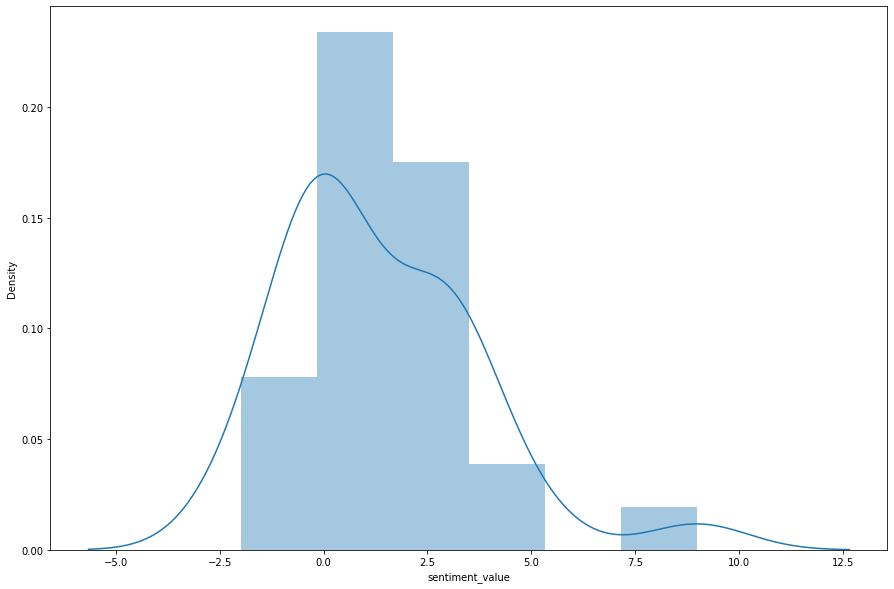

In [52]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])